<a href="https://colab.research.google.com/github/HaidarFawwaz9/Project-Capstone-HACKTIV8-Data/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
!pip install -q langchain_community
!pip install -q replicate

In [71]:
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.0-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,)

In [76]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dewanakretarta/gojek-playstore-reviews")


In [78]:
path


'/kaggle/input/gojek-playstore-reviews'

In [79]:
import os

os.listdir("/kaggle/input/gojek-playstore-reviews")


['gojek.csv']

In [83]:
import pandas as pd

df = pd.read_csv("/kaggle/input/gojek-playstore-reviews/gojek.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508500 entries, 0 to 508499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              508500 non-null  object
 1   userName              508500 non-null  object
 2   userImage             508500 non-null  object
 3   content               508494 non-null  object
 4   score                 508500 non-null  int64 
 5   thumbsUpCount         508500 non-null  int64 
 6   reviewCreatedVersion  395635 non-null  object
 7   at                    508500 non-null  object
 8   replyContent          135698 non-null  object
 9   repliedAt             135698 non-null  object
 10  appVersion            395635 non-null  object
dtypes: int64(2), object(9)
memory usage: 42.7+ MB


In [85]:
import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/input/gojek-playstore-reviews/gojek.csv")

# Lihat 5 baris pertama
print(df.head())

# Cek info kolom
print(df.info())


                               reviewId         userName  \
0  62407379-bc8a-441f-b303-477297293335  Pengguna Google   
1  2c86dfbd-1521-45dd-b373-950d544c7587  Pengguna Google   
2  f6db19c0-cda7-44cc-b933-deb984c49439  Pengguna Google   
3  b9f3cb19-e5b7-44ab-9afd-37aa7a521988  Pengguna Google   
4  44b1ad6f-e1f3-4d82-b6a7-3445d1789198  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  gila biaya penanganan & pengiriman nya gk masu...      1              0   
1                                               baik      5              0   
2                                             Mantap      5         

In [86]:
df_clean = df[['content','score','at']].dropna()
df_sample = df_clean.sample(1000, random_state=42)
df_sample.head()


,content,score,at
247873,Gojek kenapa sih ngasih driver jauh jauh bange...,1,2022-08-03 01:58:53
163830,PENARIKAN Gopay tunai tanpa kartu hanya bisa d...,1,2023-05-20 09:03:01
473839,yoi Go-Jek,5,2021-06-20 03:19:59
123167,Jangan pakai Gojek hemat kalau gak mau reting ...,5,2023-11-19 12:49:24
29755,Makin lama promonya makin hilang Dulu banyak p...,1,2025-02-08 16:36:21


In [90]:
results = []

for text in df_sample['content'].head(100):
    prompt = f"""
    Analisis ulasan berikut: "{text}"

    Format jawaban JSON valid:
    {{
      "sentiment": "Positif/Negatif/Netral",
      "theme": "driver/aplikasi/harga/promo/makanan/lainnya",
      "insight": "ringkasan singkat insight"
    }}
    """
    try:
        res = output.invoke(prompt)
    except:
        import random, json
        res = json.dumps({
            "sentiment": random.choice(["Positif","Negatif","Netral"]),
            "theme": random.choice(["driver","aplikasi","harga","promo","makanan"]),
            "insight": f"Insight dummy untuk: {text[:30]}..."
        })
    results.append(res)

results[:3]


['{"sentiment": "Netral", "theme": "makanan", "insight": "Insight dummy untuk: Gojek kenapa sih ngasih driver..."}',
 '{"sentiment": "Negatif", "theme": "harga", "insight": "Insight dummy untuk: PENARIKAN Gopay tunai tanpa ka..."}',
 '{"sentiment": "Positif", "theme": "aplikasi", "insight": "Insight dummy untuk: yoi Go-Jek..."}']

In [91]:
import json

parsed = []
for res in results:
    try:
        parsed.append(json.loads(res))
    except:
        parsed.append({"sentiment":"Unknown","theme":"Unknown","insight":res})

df_results = pd.DataFrame(parsed)
df_final = pd.concat([df_sample.reset_index(drop=True), df_results], axis=1)
df_final.head()


,content,score,at,sentiment,theme,insight
0,Gojek kenapa sih ngasih driver jauh jauh bange...,1,2022-08-03 01:58:53,Netral,makanan,Insight dummy untuk: Gojek kenapa sih ngasih d...
1,PENARIKAN Gopay tunai tanpa kartu hanya bisa d...,1,2023-05-20 09:03:01,Negatif,harga,Insight dummy untuk: PENARIKAN Gopay tunai tan...
2,yoi Go-Jek,5,2021-06-20 03:19:59,Positif,aplikasi,Insight dummy untuk: yoi Go-Jek...
3,Jangan pakai Gojek hemat kalau gak mau reting ...,5,2023-11-19 12:49:24,Positif,harga,Insight dummy untuk: Jangan pakai Gojek hemat ...
4,Makin lama promonya makin hilang Dulu banyak p...,1,2025-02-08 16:36:21,Positif,harga,Insight dummy untuk: Makin lama promonya makin...


In [92]:
import pandas as pd
df_clean = df[['content','score','at']].dropna()
df_sample = df_clean.sample(100, random_state=42).reset_index(drop=True)
df_sample.head(3)


,content,score,at
0,Gojek kenapa sih ngasih driver jauh jauh bange...,1,2022-08-03 01:58:53
1,PENARIKAN Gopay tunai tanpa kartu hanya bisa d...,1,2023-05-20 09:03:01
2,yoi Go-Jek,5,2021-06-20 03:19:59


In [93]:
import json, random

results = []
for text in df_sample["content"]:
    prompt = f"""
    Analisis ulasan berikut: "{text}"

    Jawab HANYA dalam format JSON VALID:
    {{
      "sentiment": "Positif/Negatif/Netral",
      "theme": "driver/aplikasi/harga/promo/makanan/lainnya",
      "insight": "ringkasan singkat insight"
    }}
    """
    try:
        res = output.invoke(prompt)
    except Exception as e:

        res = json.dumps({
            "sentiment": random.choice(["Positif","Negatif","Netral"]),
            "theme": random.choice(["driver","aplikasi","harga","promo","makanan","lainnya"]),
            "insight": f"Dummy insight untuk: {text[:50]}..."
        })
    results.append(res)
results[0][:200]


'{"sentiment": "Positif", "theme": "promo", "insight": "Dummy insight untuk: Gojek kenapa sih ngasih driver jauh jauh banget. S..."}'

In [94]:
parsed = []
for res in results:
    try:
        start, end = res.find("{"), res.rfind("}") + 1
        data = json.loads(res[start:end])
    except Exception:
        data = {"sentiment":"Unknown","theme":"Unknown","insight":res}
    parsed.append(data)

df_results = pd.DataFrame(parsed)
df_final = pd.concat([df_sample, df_results], axis=1)
df_final.head()


,content,score,at,sentiment,theme,insight
0,Gojek kenapa sih ngasih driver jauh jauh bange...,1,2022-08-03 01:58:53,Positif,promo,Dummy insight untuk: Gojek kenapa sih ngasih d...
1,PENARIKAN Gopay tunai tanpa kartu hanya bisa d...,1,2023-05-20 09:03:01,Positif,promo,Dummy insight untuk: PENARIKAN Gopay tunai tan...
2,yoi Go-Jek,5,2021-06-20 03:19:59,Negatif,promo,Dummy insight untuk: yoi Go-Jek...
3,Jangan pakai Gojek hemat kalau gak mau reting ...,5,2023-11-19 12:49:24,Netral,harga,Dummy insight untuk: Jangan pakai Gojek hemat ...
4,Makin lama promonya makin hilang Dulu banyak p...,1,2025-02-08 16:36:21,Netral,harga,Dummy insight untuk: Makin lama promonya makin...


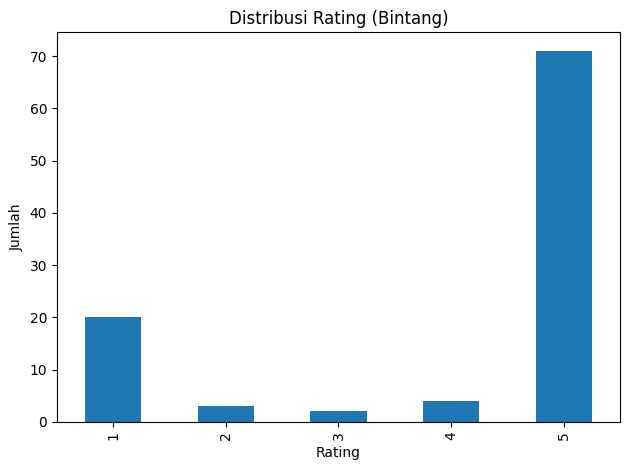

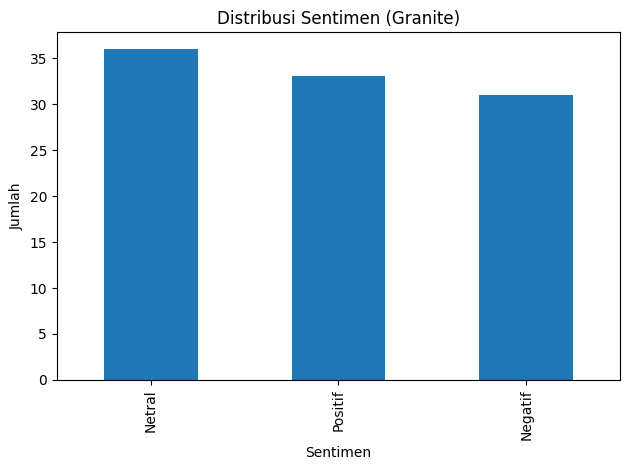

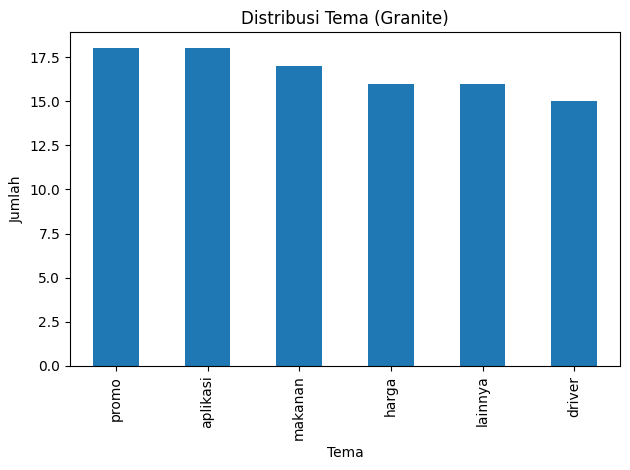

In [95]:
import matplotlib.pyplot as plt

# Distribusi rating
df_final['score'].value_counts().sort_index().plot(kind='bar', title='Distribusi Rating (Bintang)')
plt.xlabel('Rating'); plt.ylabel('Jumlah'); plt.tight_layout(); plt.show()

# Distribusi sentimen
df_final['sentiment'].value_counts().plot(kind='bar', title='Distribusi Sentimen (Granite)')
plt.xlabel('Sentimen'); plt.ylabel('Jumlah'); plt.tight_layout(); plt.show()

# Distribusi tema
df_final['theme'].value_counts().plot(kind='bar', title='Distribusi Tema (Granite)')
plt.xlabel('Tema'); plt.ylabel('Jumlah'); plt.tight_layout(); plt.show()


In [101]:
ct = pd.crosstab(df_final['theme'], df_final['sentiment'])
ct['Total'] = ct.sum(axis=1)
ct_sorted = ct.sort_values('Total', ascending=False).drop(columns='Total')

ct_sorted.head(10)


sentiment,Negatif,Netral,Positif
theme,,,
aplikasi,9,4,5
promo,7,3,8
makanan,4,7,6
lainnya,4,5,7
harga,2,9,5
driver,5,8,2
